In [1]:
import copy
import cv2
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

img_width, img_height = (64, 64)

renderer_pc = o3d.visualization.rendering.OffscreenRenderer(img_width, img_height)
renderer_pc.scene.set_background(np.array([0, 0, 0, 0]))


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x70c2c4000010 (threading is enabled)
EGL(1.5)
OpenGL(4.6)


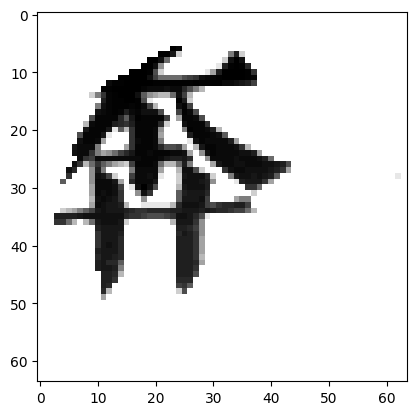

In [3]:
import random


renderer_pc.scene.clear_geometry()
pcd = o3d.io.read_triangle_mesh('input/2d3d/database/%d.stl' % 92)

mat = o3d.visualization.rendering.MaterialRecord()
mat.shader = 'defaultUnlit'

renderer_pc.scene.add_geometry("pcd", pcd, mat)

# Optionally set the camera field of view (to zoom in a bit)
vertical_field_of_view = 15.0  # between 5 and 90 degrees
aspect_ratio = img_width / img_height  # azimuth over elevation
near_plane = 0.1
far_plane = 50.0
fov_type = o3d.visualization.rendering.Camera.FovType.Vertical
renderer_pc.scene.camera.set_projection(vertical_field_of_view, aspect_ratio, near_plane, far_plane, fov_type)

# Look at the origin from the front (along the -Z direction, into the screen), with Y as Up.
center = [0, 0, 0]  # look_at target
eye = [0, 0, 4]  # camera position
up = [0, 1, 0]  # camera orientation
renderer_pc.scene.camera.look_at(center, eye, up)

depth_image = np.asarray(renderer_pc.render_to_depth_image())
depth_image[depth_image==1.0] = np.unique(depth_image)[-2]

normalized_image = depth_image.copy()
normalized_image = (normalized_image - normalized_image.min()) / (normalized_image.max() - normalized_image.min())
normalized_image = np.round(normalized_image, decimals=2)
threshold = 0.2
# # print(threshold)
# normalized_image[normalized_image < threshold] = 0.0
normalized_image[normalized_image > threshold] =  threshold
normalized_image = (normalized_image - normalized_image.min()) / (normalized_image.max() - normalized_image.min())
normalized_image **= 2
plt.imshow(normalized_image, cmap='gray')

In [4]:
import os
list(os.walk('input/2d3d/database/'))[0][2]

['0.stl', '92.stl']

  0%|          | 0/252 [00:00<?, ?it/s]


[Open3D WARNING] Read geometry::TriangleMesh failed: unknown file extension.


IndexError: index -2 is out of bounds for axis 0 with size 1

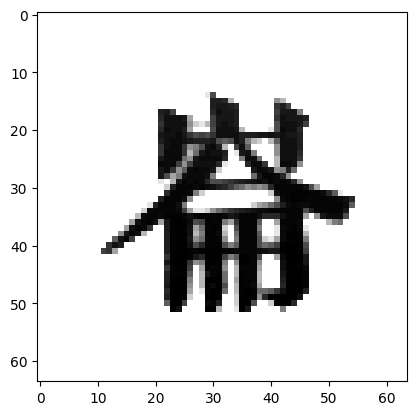

In [6]:
from tqdm import tqdm
import os
for dirpath, dirnames, filenames in os.walk('input/2d3d/database'):
  os.makedirs('input/2d3d/database/pairs/', exist_ok=True)
  for stlname in tqdm(filenames):
    target = os.path.join('input/2d3d/database/pairs', stlname.replace('stl', 'png'))
    infile = os.path.join('input/2d3d/database/', stlname)
    renderer_pc.scene.clear_geometry()
    pcd = o3d.io.read_triangle_mesh(infile)

    mat = o3d.visualization.rendering.MaterialRecord()
    mat.shader = 'defaultUnlit'

    renderer_pc.scene.add_geometry("pcd", pcd, mat)

    # Optionally set the camera field of view (to zoom in a bit)
    vertical_field_of_view = 15.0  # between 5 and 90 degrees
    aspect_ratio = img_width / img_height  # azimuth over elevation
    near_plane = 0.1
    far_plane = 50.0
    fov_type = o3d.visualization.rendering.Camera.FovType.Vertical
    renderer_pc.scene.camera.set_projection(vertical_field_of_view, aspect_ratio, near_plane, far_plane, fov_type)

    # Look at the origin from the front (along the -Z direction, into the screen), with Y as Up.
    center = [0, 0, 0]  # look_at target
    eye = [0, 0, 4]  # camera position
    up = [0, 1, 0]  # camera orientation
    renderer_pc.scene.camera.look_at(center, eye, up)

    depth_image = np.asarray(renderer_pc.render_to_depth_image())
    depth_image[depth_image==1.0] = np.unique(depth_image)[-2]

    normalized_image = depth_image.copy()
    normalized_image = (normalized_image - normalized_image.min()) / (normalized_image.max() - normalized_image.min())
    normalized_image = np.round(normalized_image, decimals=2)
    threshold = 0.2
    # # print(threshold)
    # normalized_image[normalized_image < threshold] = 0.0
    normalized_image[normalized_image > threshold] =  threshold
    normalized_image = (normalized_image - normalized_image.min()) / (normalized_image.max() - normalized_image.min())
    normalized_image **= 2
    plt.imshow(normalized_image, cmap='gray')
    plt.savefig(target)

In [7]:
import os
from tqdm import tqdm
s = []
for dirpath, dirnames, filenames in os.walk('input/2d3d/database'):
  os.makedirs('input/2d3d/database/pairs/', exist_ok=True)
  for stlname in tqdm(filenames):
    if 'stl' not in stlname: continue
    s += [int(stlname.replace('.stl', ''))]

100%|██████████| 252/252 [00:00<00:00, 964383.77it/s]


In [8]:
sorted(s) == list(range(252))

True